In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import metrics

In [2]:
'''import os
os.getcwd()
os.chdir('/Users/avanijain/Desktop/Machine_Learning/Ml_project/student-mat.csv')'''

"import os\nos.getcwd()\nos.chdir('/Users/avanijain/Desktop/Machine_Learning/Ml_project/student-mat.csv')"

In [7]:
df = pd.read_csv('/Users/avanijain/Desktop/Machine_Learning/Ml_project/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


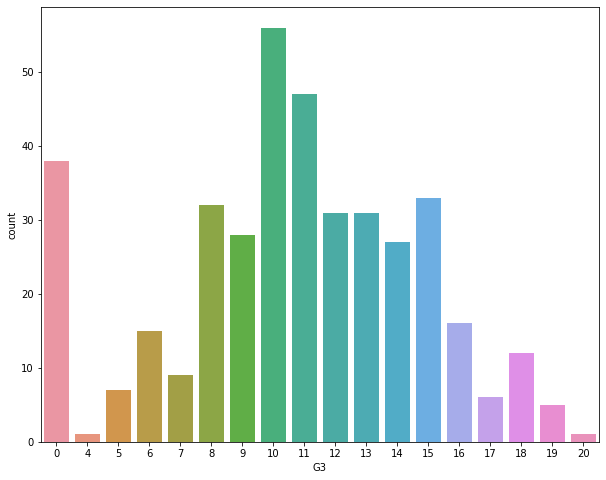

In [4]:
plt.figure(figsize=(10,8))
sb.countplot(df.G3)

In [5]:
#Check the Null values
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [6]:
#Categorical Variable
dfConverted = pd.get_dummies(df)

In [7]:
#avoiding the dummy variable trap
Z= dfConverted.drop('romantic_yes', axis = 1)


In [8]:
X = Z.drop('G3', axis = 1)
y = Z[['G3']]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
#Fitting linear regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#predicting the test set results
ypred=regressor.predict(X_test)
ypred

array([[14.18887329],
       [10.73102951],
       [ 9.39627457],
       [15.54544449],
       [16.56179428],
       [11.73552704],
       [13.27112961],
       [10.30544281],
       [ 8.14863586],
       [13.58937836],
       [ 7.11230087],
       [15.79668808],
       [11.32617188],
       [ 8.95713425],
       [15.09466934],
       [14.8895607 ],
       [12.90607071],
       [ 8.03848648],
       [ 9.05532455],
       [14.49982071],
       [ 6.36320877],
       [ 2.55815887],
       [ 5.94802094],
       [14.67378616],
       [11.55204773],
       [15.53261185],
       [ 9.24933243],
       [20.49869919],
       [-0.64826965],
       [13.24203873],
       [-1.18688583],
       [ 6.42219543],
       [ 7.5165596 ],
       [ 5.34906769],
       [12.64536667],
       [10.64516068],
       [13.4645195 ],
       [18.57098007],
       [ 8.63157654],
       [11.5162468 ],
       [ 4.21286011],
       [19.05892563],
       [ 7.08346558],
       [ 7.95284653],
       [10.21324539],
       [-3

In [12]:
#Building the Optimal model model using Backward Elimination
X=np.append(arr= np.ones((395,1)).astype(int),values=X,axis=1)
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j]== maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]]
X_Modeled = backwardElimination(X_opt, SL)

In [13]:
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_Modeled, y, test_size=0.2, random_state=0)


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_model,y_train_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#predicting the test set results
ypred_model=regressor.predict(X_test_model)
ypred_model

array([[13.9810386 ],
       [10.43289573],
       [ 9.45361707],
       [15.59008929],
       [16.23585396],
       [11.98224875],
       [12.55359898],
       [10.42121378],
       [ 7.62375631],
       [14.73539962],
       [ 6.9591673 ],
       [14.66253403],
       [11.14127458],
       [ 8.19231265],
       [14.87054526],
       [14.38294297],
       [12.7391936 ],
       [ 8.95795715],
       [ 8.86292572],
       [15.01642412],
       [ 6.38641736],
       [ 3.14228344],
       [ 6.25178848],
       [15.01694089],
       [11.5854855 ],
       [16.02270306],
       [ 9.43427596],
       [20.01605687],
       [-0.05123966],
       [13.29917554],
       [-0.9768112 ],
       [ 7.21519281],
       [ 7.06879718],
       [ 5.85383414],
       [13.12726415],
       [10.02214112],
       [13.40932219],
       [18.74450372],
       [ 8.11646622],
       [11.79820443],
       [ 4.24174864],
       [18.28405925],
       [ 7.29623287],
       [ 8.10521624],
       [10.15433675],
       [-1

In [16]:
## pair the feature with the coefficients
list(zip(X_Modeled, regressor.coef_))

[(array([18,  4,  6,  5,  6]),
  array([-0.25602551,  0.24425876,  0.05507332,  0.10962988,  0.99965331]))]

In [17]:
#r-SQUARED
regressor_OLS=sm.OLS(endog=y, exog=X_Modeled).fit()
regressor_OLS.summary()
regressor_OLS.rsquared

0.9730797818073089

In [18]:
#Model Evaluation Metrics for Regression
# calculate MAE, MSE, RMSE with all the variables
print(metrics.mean_absolute_error(y_test, ypred))
print(metrics.mean_squared_error(y_test, ypred))
print(np.sqrt(metrics.mean_squared_error(y_test, ypred)))

1.6103288191783278
5.845178266970442
2.4176803483857086


In [19]:
#Model Evaluation Metrics for Regression
# calculate MAE, MSE, RMSE with the best variables
print(metrics.mean_absolute_error(y_test, ypred_model))
print(metrics.mean_squared_error(y_test, ypred_model))
print(np.sqrt(metrics.mean_squared_error(y_test, ypred_model)))

1.3934764142640703
5.291720423625023
2.300373974732157
